## Imports

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

URL = "https://covid-19-greece.herokuapp.com/"
response = requests.get(URL+"confirmed")
data = pd.DataFrame.from_records(response.json()["cases"])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

sns.set(rc = {'figure.figsize':(20,10)})

## Total confirmed cases per day (does not count cured cases)

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911., 737972., 738034., 738095.]),
 <a list of 12 Text xticklabel objects>)

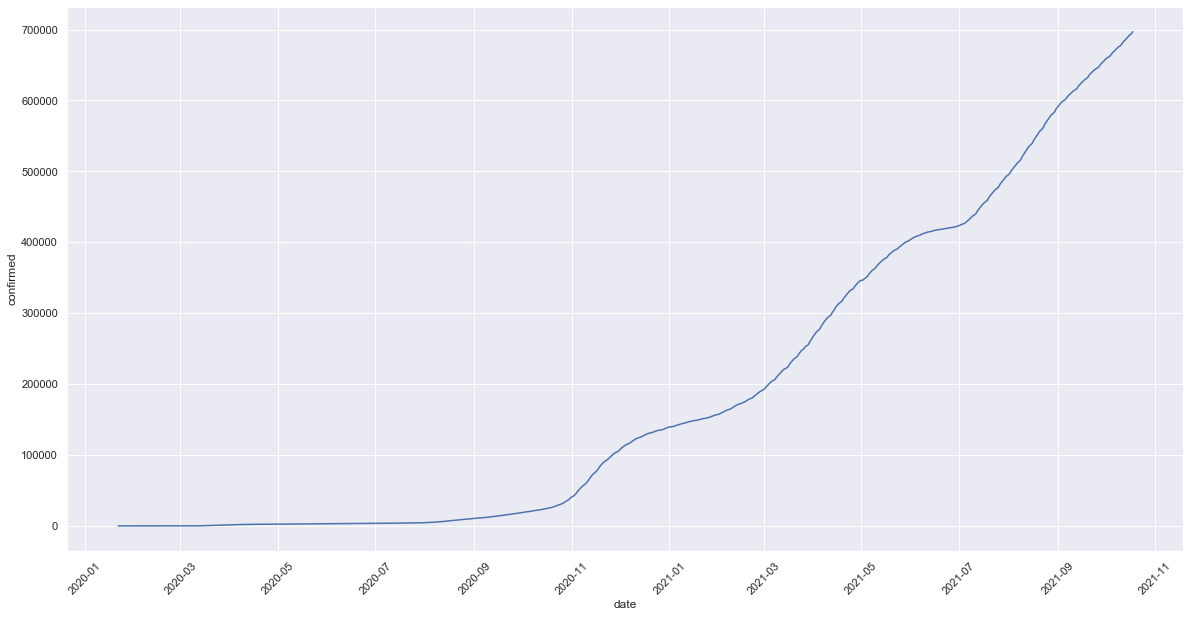

In [2]:
plot = sns.lineplot(x="date", y="confirmed", data=data)
plt.xticks(rotation=45)

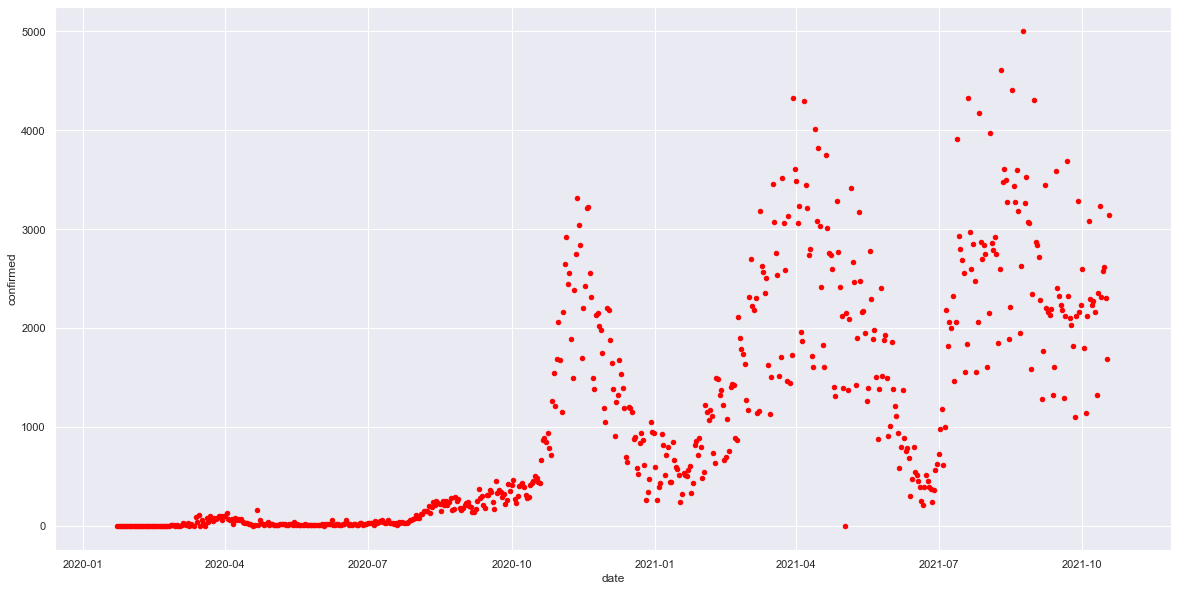

In [3]:
data["confirmed"] = data["confirmed"].diff()
data = data.dropna()
data.plot(kind='scatter', x='date', y='confirmed', color='red')
plt.show()